## Sentiment Analysis

In this exercise we use the IMDb-dataset, which we will use to perform a sentiment analysis. The code below assumes that the data is placed in the same folder as this notebook. We see that the reviews are loaded as a pandas dataframe, and print the beginning of the first few reviews.

In [1]:
import numpy as np
import pandas as pd

reviews = pd.read_csv('reviews.txt', header=None)
labels = pd.read_csv('labels.txt', header=None)
Y = (labels=='positive').astype(np.int_)

print(type(reviews))
print(reviews.head())

<class 'pandas.core.frame.DataFrame'>
                                                   0
0  bromwell high is a cartoon comedy . it ran at ...
1  story of a man who has unnatural feelings for ...
2  homelessness  or houselessness as george carli...
3  airport    starts as a brand new luxury    pla...
4  brilliant over  acting by lesley ann warren . ...


**(a)** Split the reviews and labels in test, train and validation sets. The train and validation sets will be used to train your model and tune hyperparameters, the test set will be saved for testing. Use the `CountVectorizer` from `sklearn.feature_extraction.text` to create a Bag-of-Words representation of the reviews. Only use the 10,000 most frequent words (use the `max_features`-parameter of `CountVectorizer`).

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

reviews = reviews[0].tolist()
Y = Y.values.ravel()  # Convert DataFrame to NumPy array
vectorizer = CountVectorizer(max_features=10000)
reviews_bow = vectorizer.fit_transform(reviews)

X_train, X_test, Y_train, Y_test = train_test_split(reviews, Y, test_size=0.2, random_state=42)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)

vectorizer = CountVectorizer(max_features=10000)

# Fit the vectorizer on the training data and transform both the training and validation data with the xtrained vectorizer
X_train_bow = vectorizer.fit_transform(X_train)
X_val_bow = vectorizer.transform(X_val)
X_test_bow = vectorizer.transform(X_test)

**(b)** Explore the representation of the reviews. How is a single word represented? How about a whole review?

In [3]:
print(X_train_bow.shape)
print(X_train_bow)
df = pd.DataFrame(X_train_bow.toarray())
display(df.head(10))

(16000, 10000)
  (0, 8954)	5
  (0, 5652)	1
  (0, 4894)	1
  (0, 1731)	2
  (0, 6163)	4
  (0, 7662)	1
  (0, 9073)	1
  (0, 9680)	1
  (0, 1826)	1
  (0, 3518)	2
  (0, 4722)	2
  (0, 9312)	1
  (0, 8007)	1
  (0, 8334)	1
  (0, 2847)	1
  (0, 1206)	2
  (0, 1769)	1
  (0, 9079)	2
  (0, 9760)	1
  (0, 7764)	1
  (0, 5378)	1
  (0, 3748)	1
  (0, 9434)	1
  (0, 8995)	2
  (0, 4301)	1
  :	:
  (15999, 5613)	1
  (15999, 8123)	1
  (15999, 7801)	1
  (15999, 2650)	1
  (15999, 5927)	1
  (15999, 7737)	1
  (15999, 1661)	1
  (15999, 1874)	1
  (15999, 2077)	1
  (15999, 3871)	1
  (15999, 6826)	1
  (15999, 9815)	1
  (15999, 6031)	1
  (15999, 1641)	1
  (15999, 6235)	1
  (15999, 1618)	1
  (15999, 7938)	1
  (15999, 8668)	1
  (15999, 6043)	1
  (15999, 4926)	1
  (15999, 9349)	1
  (15999, 7483)	1
  (15999, 6665)	1
  (15999, 6650)	1
  (15999, 4608)	1


,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Each row represents a document (review in this case), and each column represents a unique word in the vocabulary (set of 10000 most frequent words). The numbers in the matrix indicate the frequency of each word in the corresponding document.

**(0, 8954) 5**: This means that in the first document (index 0), the word represented by the 8954th feature in the vocabulary appears 5 times.

**(c)** Train a neural network with a single hidden layer on the dataset, tuning the relevant hyperparameters to optimize accuracy. 

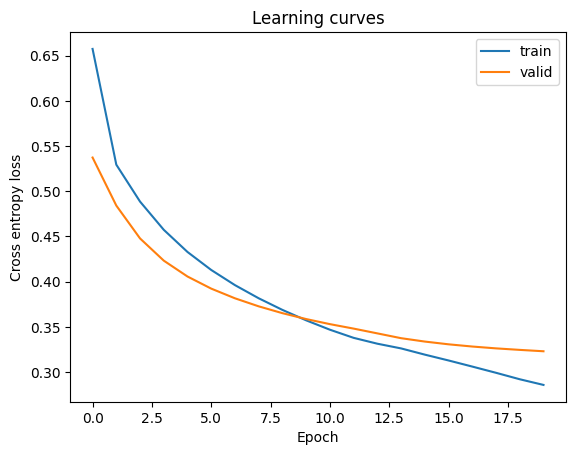

500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9042 - loss: 0.2567
Loss + accuracy on train data: [0.2688571810722351, 0.8961250185966492]
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8758 - loss: 0.3112
Loss + accuracy on val data: [0.32126814126968384, 0.8725000023841858]


In [4]:
%matplotlib inline
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dropout
from tensorflow.keras import regularizers
import numpy as np
from numpy.random import seed, randint

input_size = X_train_bow.shape[1]

Y_train = to_categorical(Y_train)
Y_val = to_categorical(Y_val)
Y_test = to_categorical(Y_test)

seed(0)
tf.random.set_seed(0)

model = Sequential() # initialize a neural network
model.add(Dense(units = 300, activation='tanh')) # add a hidden layer
model.add(Dense(units = 2, activation='softmax')) #add the output layer

sgd = optimizers.SGD(learning_rate = 0.01)
model.compile(loss = 'categorical_crossentropy', optimizer = sgd, metrics = ['accuracy'])

history = model.fit(X_train_bow, Y_train, epochs = 20, batch_size = 128, verbose = 0, validation_split = 0.2)

plt.figure()
plt.title("Learning curves")
plt.xlabel("Epoch")
plt.ylabel("Cross entropy loss")
plt.plot(history.history['loss'], label = 'train')
plt.plot(history.history['val_loss'], label = 'valid')
plt.legend()
plt.show()

print("Loss + accuracy on train data: {}".format(model.evaluate(X_train_bow, Y_train)))
print("Loss + accuracy on val data: {}".format(model.evaluate(X_val_bow, Y_val)))

**(d)** Test your sentiment-classifier on the test set.

In [5]:
print("Loss + accuracy on test data: {}".format(model.evaluate(X_test_bow, Y_test)))

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8647 - loss: 0.3234
Loss + accuracy on test data: [0.3204234838485718, 0.8708000183105469]


**(e)** Use the classifier to classify a few sentences you write yourselves. 

In [6]:
# Example sentences to classify
sentences = [
    "This movie is fantastic!",
    "I didn't like this movie, it was pretty bad.",
    "The plot was very simple, there were no clifhangars, but overall not a bad one.",
    "I don't understand how this movie made it into the cinemas, there was nothing good about it."
]

# Transform the sentences using the same vectorizer used for training
sentences_bow = vectorizer.transform(sentences)

# Make predictions
predictions = model.predict(sentences_bow)

# Convert predictions to labels
decoded_predictions = ['positive' if prediction[1] >= 0.5 else 'negative' for prediction in predictions]

# Print the sentences along with their predicted labels
for sentence, label in zip(sentences, decoded_predictions):
    print(f"Sentence: {sentence} | Predicted Label: {label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
Sentence: This movie is fantastic! | Predicted Label: positive
Sentence: I didn't like this movie, it was pretty bad. | Predicted Label: negative
Sentence: The plot was very simple, there were no clifhangars, but overall not a bad one. | Predicted Label: negative
Sentence: I don't understand how this movie made it into the cinemas, there was nothing good about it. | Predicted Label: negative
